# <center> Telco; Why are customers churning? 

In [1]:
from acquire import get_telco_data
from prepare import clean_data, train_validate_test_split

import pandas as pd
import numpy as np
from scipy import stats
import math

import matplotlib.pyplot as plt
import seaborn as sns

# preparing

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

from sklearn.metrics import confusion_matrix, classification_report, recall_score, f1_score, precision_score
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Planning

## Goals

- Find Churn drivers.
- Acquire Telco data creeating a fuction that would access the SQL database.
- Use a a python funcion that will clean and tidy up the data. 
- Build 3 different models to predict churn using classification algorithms.
-
-
-
- Conclusion, takeaways, and next steps.

# Acquire Data

In [2]:
# Use the imported function from acquire.py to panda data frame
df = get_telco_data()
# View the first 5 recored of data frame a look at our dataframe
df.head(5).T

,0,1,2,3,4
payment_type_id,2,4,3,4,3
internet_service_type_id,1,1,1,1,1
contract_type_id,3,3,3,3,3
customer_id,0016-QLJIS,0017-DINOC,0019-GFNTW,0056-EPFBG,0078-XZMHT
gender,Female,Male,Female,Male,Male
senior_citizen,0,0,0,0,0
partner,Yes,No,No,Yes,Yes
dependents,Yes,No,No,Yes,No
tenure,65,54,56,20,72
phone_service,Yes,No,No,No,Yes


# Prepare

In [3]:
df.shape

(7043, 24)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type_id           7043 non-null   int64  
 1   internet_service_type_id  7043 non-null   int64  
 2   contract_type_id          7043 non-null   int64  
 3   customer_id               7043 non-null   object 
 4   gender                    7043 non-null   object 
 5   senior_citizen            7043 non-null   int64  
 6   partner                   7043 non-null   object 
 7   dependents                7043 non-null   object 
 8   tenure                    7043 non-null   int64  
 9   phone_service             7043 non-null   object 
 10  multiple_lines            7043 non-null   object 
 11  online_security           7043 non-null   object 
 12  online_backup             7043 non-null   object 
 13  device_protection         7043 non-null   object 
 14  tech_sup

In [5]:
df.describe()

,payment_type_id,internet_service_type_id,contract_type_id,senior_citizen,tenure,monthly_charges
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,2.315633,1.872923,1.690473,0.162147,32.371149,64.761692
std,1.148907,0.737796,0.833755,0.368612,24.559481,30.090047
min,1.000000,1.000000,1.000000,0.000000,0.000000,18.250000
25%,1.000000,1.000000,1.000000,0.000000,9.000000,35.500000
50%,2.000000,2.000000,1.000000,0.000000,29.000000,70.350000
75%,3.000000,2.000000,2.000000,0.000000,55.000000,89.850000
max,4.000000,3.000000,3.000000,1.000000,72.000000,118.750000


## Takeaways and actions

- `user_id` is not usefull --> delete
- Records with tenure equal to 0 are deleted --> 11 recoreds deleted
- Change object data types to proper string or numeric type
- Change `Yes` and `No` values to `0` and `1` when data type reprecents boolan values
- Create dummy values for the categorical data
- Create a column that holds value of 1 if customer has internet
- Dete all l


In [6]:
df = clean_data()

In [34]:
df.head().T

,0,1,2,3,4
payment_type_id,2,4,3,4,3
internet_service_type_id,1,1,1,1,1
contract_type_id,3,3,3,3,3
senior_citizen,0,0,0,0,0
partner,1,0,0,1,1
dependents,1,0,0,1,0
tenure,65,54,56,20,72
phone_service,1,0,0,0,1
multiple_lines,Yes,No phone service,No phone service,No phone service,Yes
online_security,Yes,Yes,Yes,Yes,No


In [8]:
train, validate, test = train_validate_test_split(df)

In [37]:
print(train.shape, validate.shape, test.shape)

(3937, 39) (1688, 39) (1407, 39)


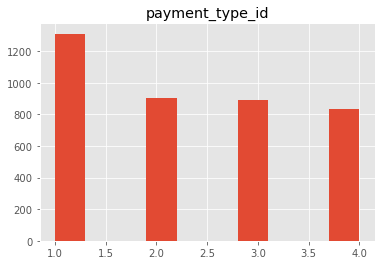

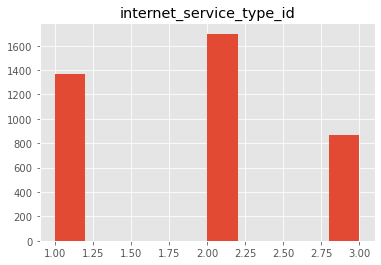

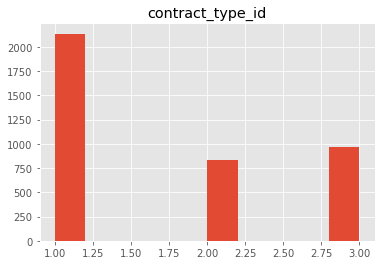

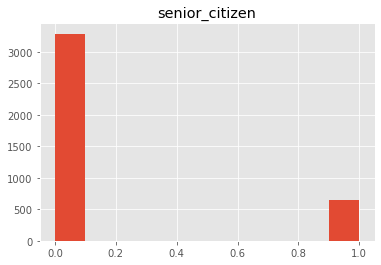

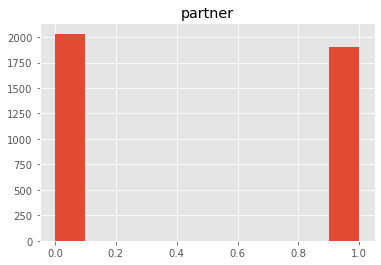

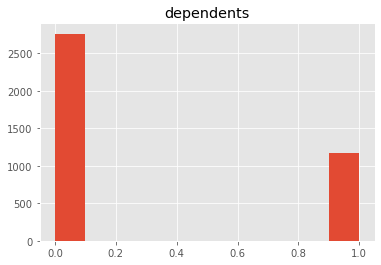

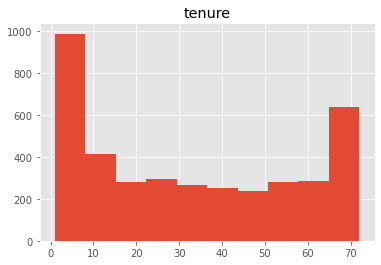

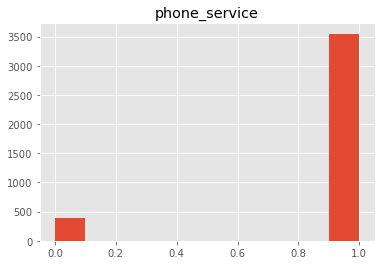

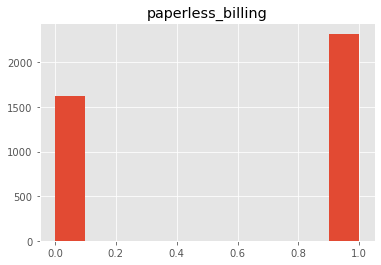

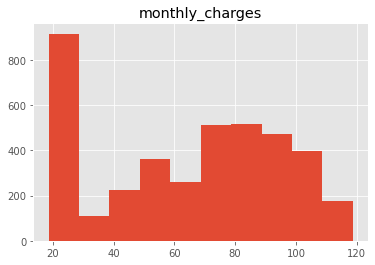

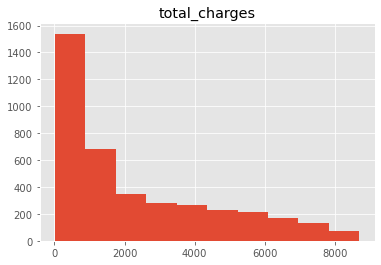

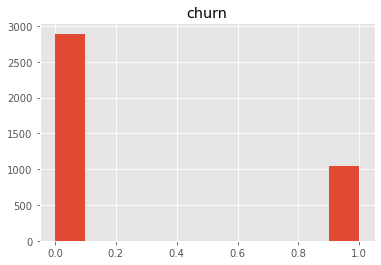

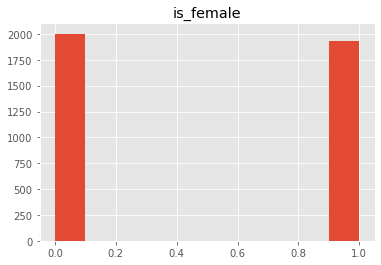

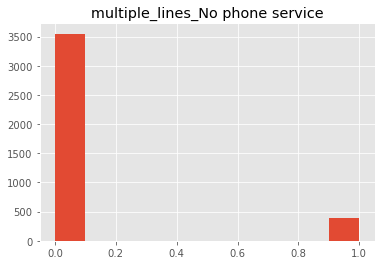

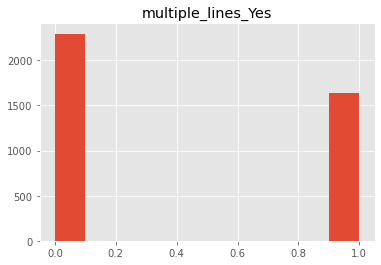

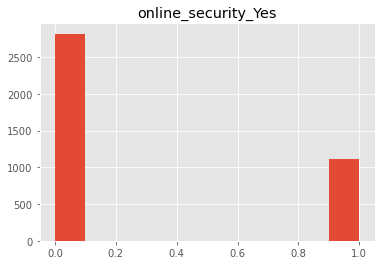

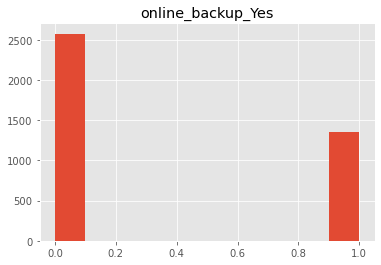

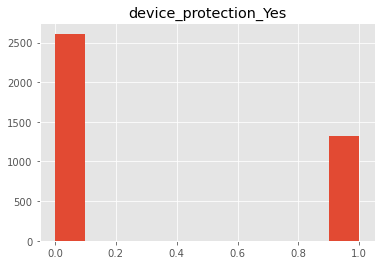

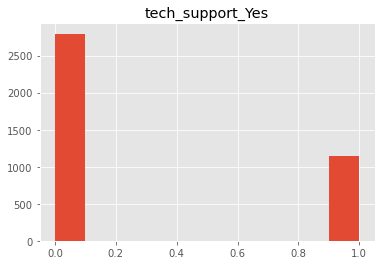

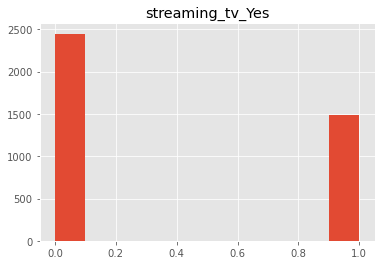

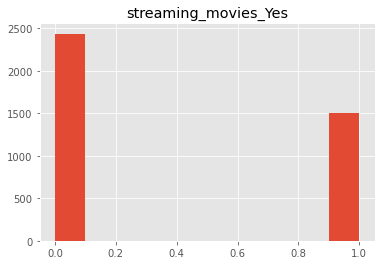

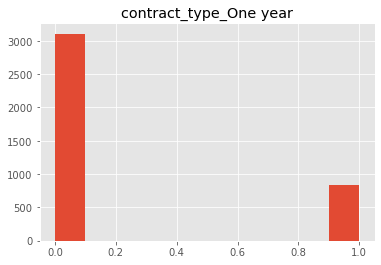

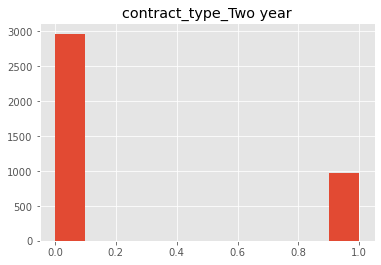

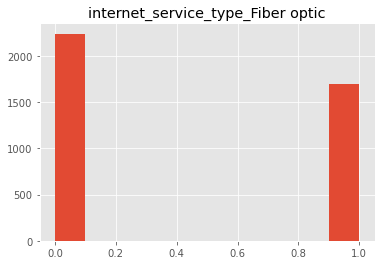

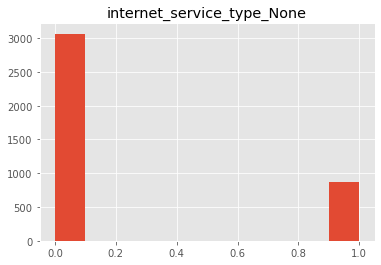

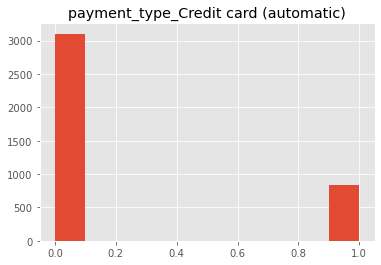

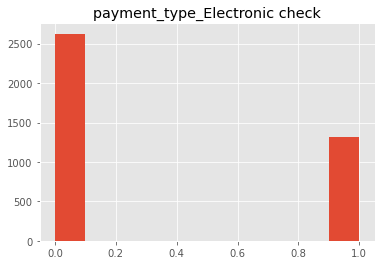

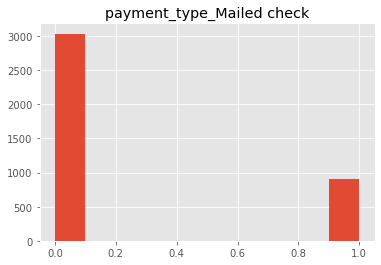

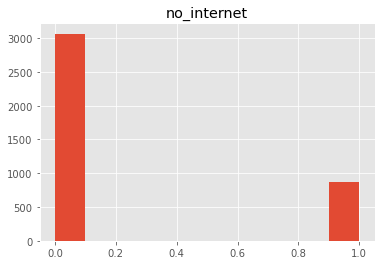

In [35]:
# Plot numeric columns
num_cols = train.columns[[train[col].dtype != 'object' for col in train.columns]]
for col in num_cols:
    plt.style.use('ggplot')
    plt.hist(train[col])
    plt.title(col)
    plt.show()

## Exploration and Pre-processing

In [39]:
# Creates a list of the attributes of the for easy retrival 

list(df.columns)

['payment_type_id',
 'internet_service_type_id',
 'contract_type_id',
 'senior_citizen',
 'partner',
 'dependents',
 'tenure',
 'phone_service',
 'multiple_lines',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'paperless_billing',
 'monthly_charges',
 'total_charges',
 'churn',
 'contract_type',
 'internet_service_type',
 'payment_type',
 'is_female',
 'multiple_lines_No phone service',
 'multiple_lines_Yes',
 'online_security_Yes',
 'online_backup_Yes',
 'device_protection_Yes',
 'tech_support_Yes',
 'streaming_tv_Yes',
 'streaming_movies_Yes',
 'contract_type_One year',
 'contract_type_Two year',
 'internet_service_type_Fiber optic',
 'internet_service_type_None',
 'payment_type_Credit card (automatic)',
 'payment_type_Electronic check',
 'payment_type_Mailed check',
 'no_internet']

In [ ]:
### Goal:
Compare churn with multiple fetures

In [31]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
payment_type_id,3937.0,2.316485,1.142942,1.00,1.00,2.00,3.00,4.00
internet_service_type_id,3937.0,1.873762,0.743580,1.00,1.00,2.00,2.00,3.00
contract_type_id,3937.0,1.704597,0.837911,1.00,1.00,1.00,2.00,3.00
senior_citizen,3937.0,0.164338,0.370629,0.00,0.00,0.00,0.00,1.00
partner,3937.0,0.483617,0.499795,0.00,0.00,0.00,1.00,1.00
dependents,3937.0,0.297943,0.457412,0.00,0.00,0.00,1.00,1.00
tenure,3937.0,32.505715,24.773712,1.00,8.00,29.00,56.00,72.00
phone_service,3937.0,0.901194,0.298440,0.00,1.00,1.00,1.00,1.00
paperless_billing,3937.0,0.589027,0.492073,0.00,0.00,1.00,1.00,1.00
monthly_charges,3937.0,64.191046,30.129425,18.55,34.95,69.95,89.45,118.75


### There is a 26.6% churn rate 

In [33]:
# Overall churn rate
f'Percentage of custumers churning \
{train.churn.value_counts(normalize=True)[1].round(3) *100}%'


'Percentage of custumers churning 26.6%'

In [43]:
churn_rate = train.churn.value_counts(normalize=True)[1]
churn_rate

0.2656845313690627

In [28]:
# Percentage of customers with internet
f'Percentage of custumers that do NOT have internet %\
{train.no_internet.value_counts(normalize=True)[1].round(3) *100}'

'Percentage of custumers that do NOT have internet %22.1'

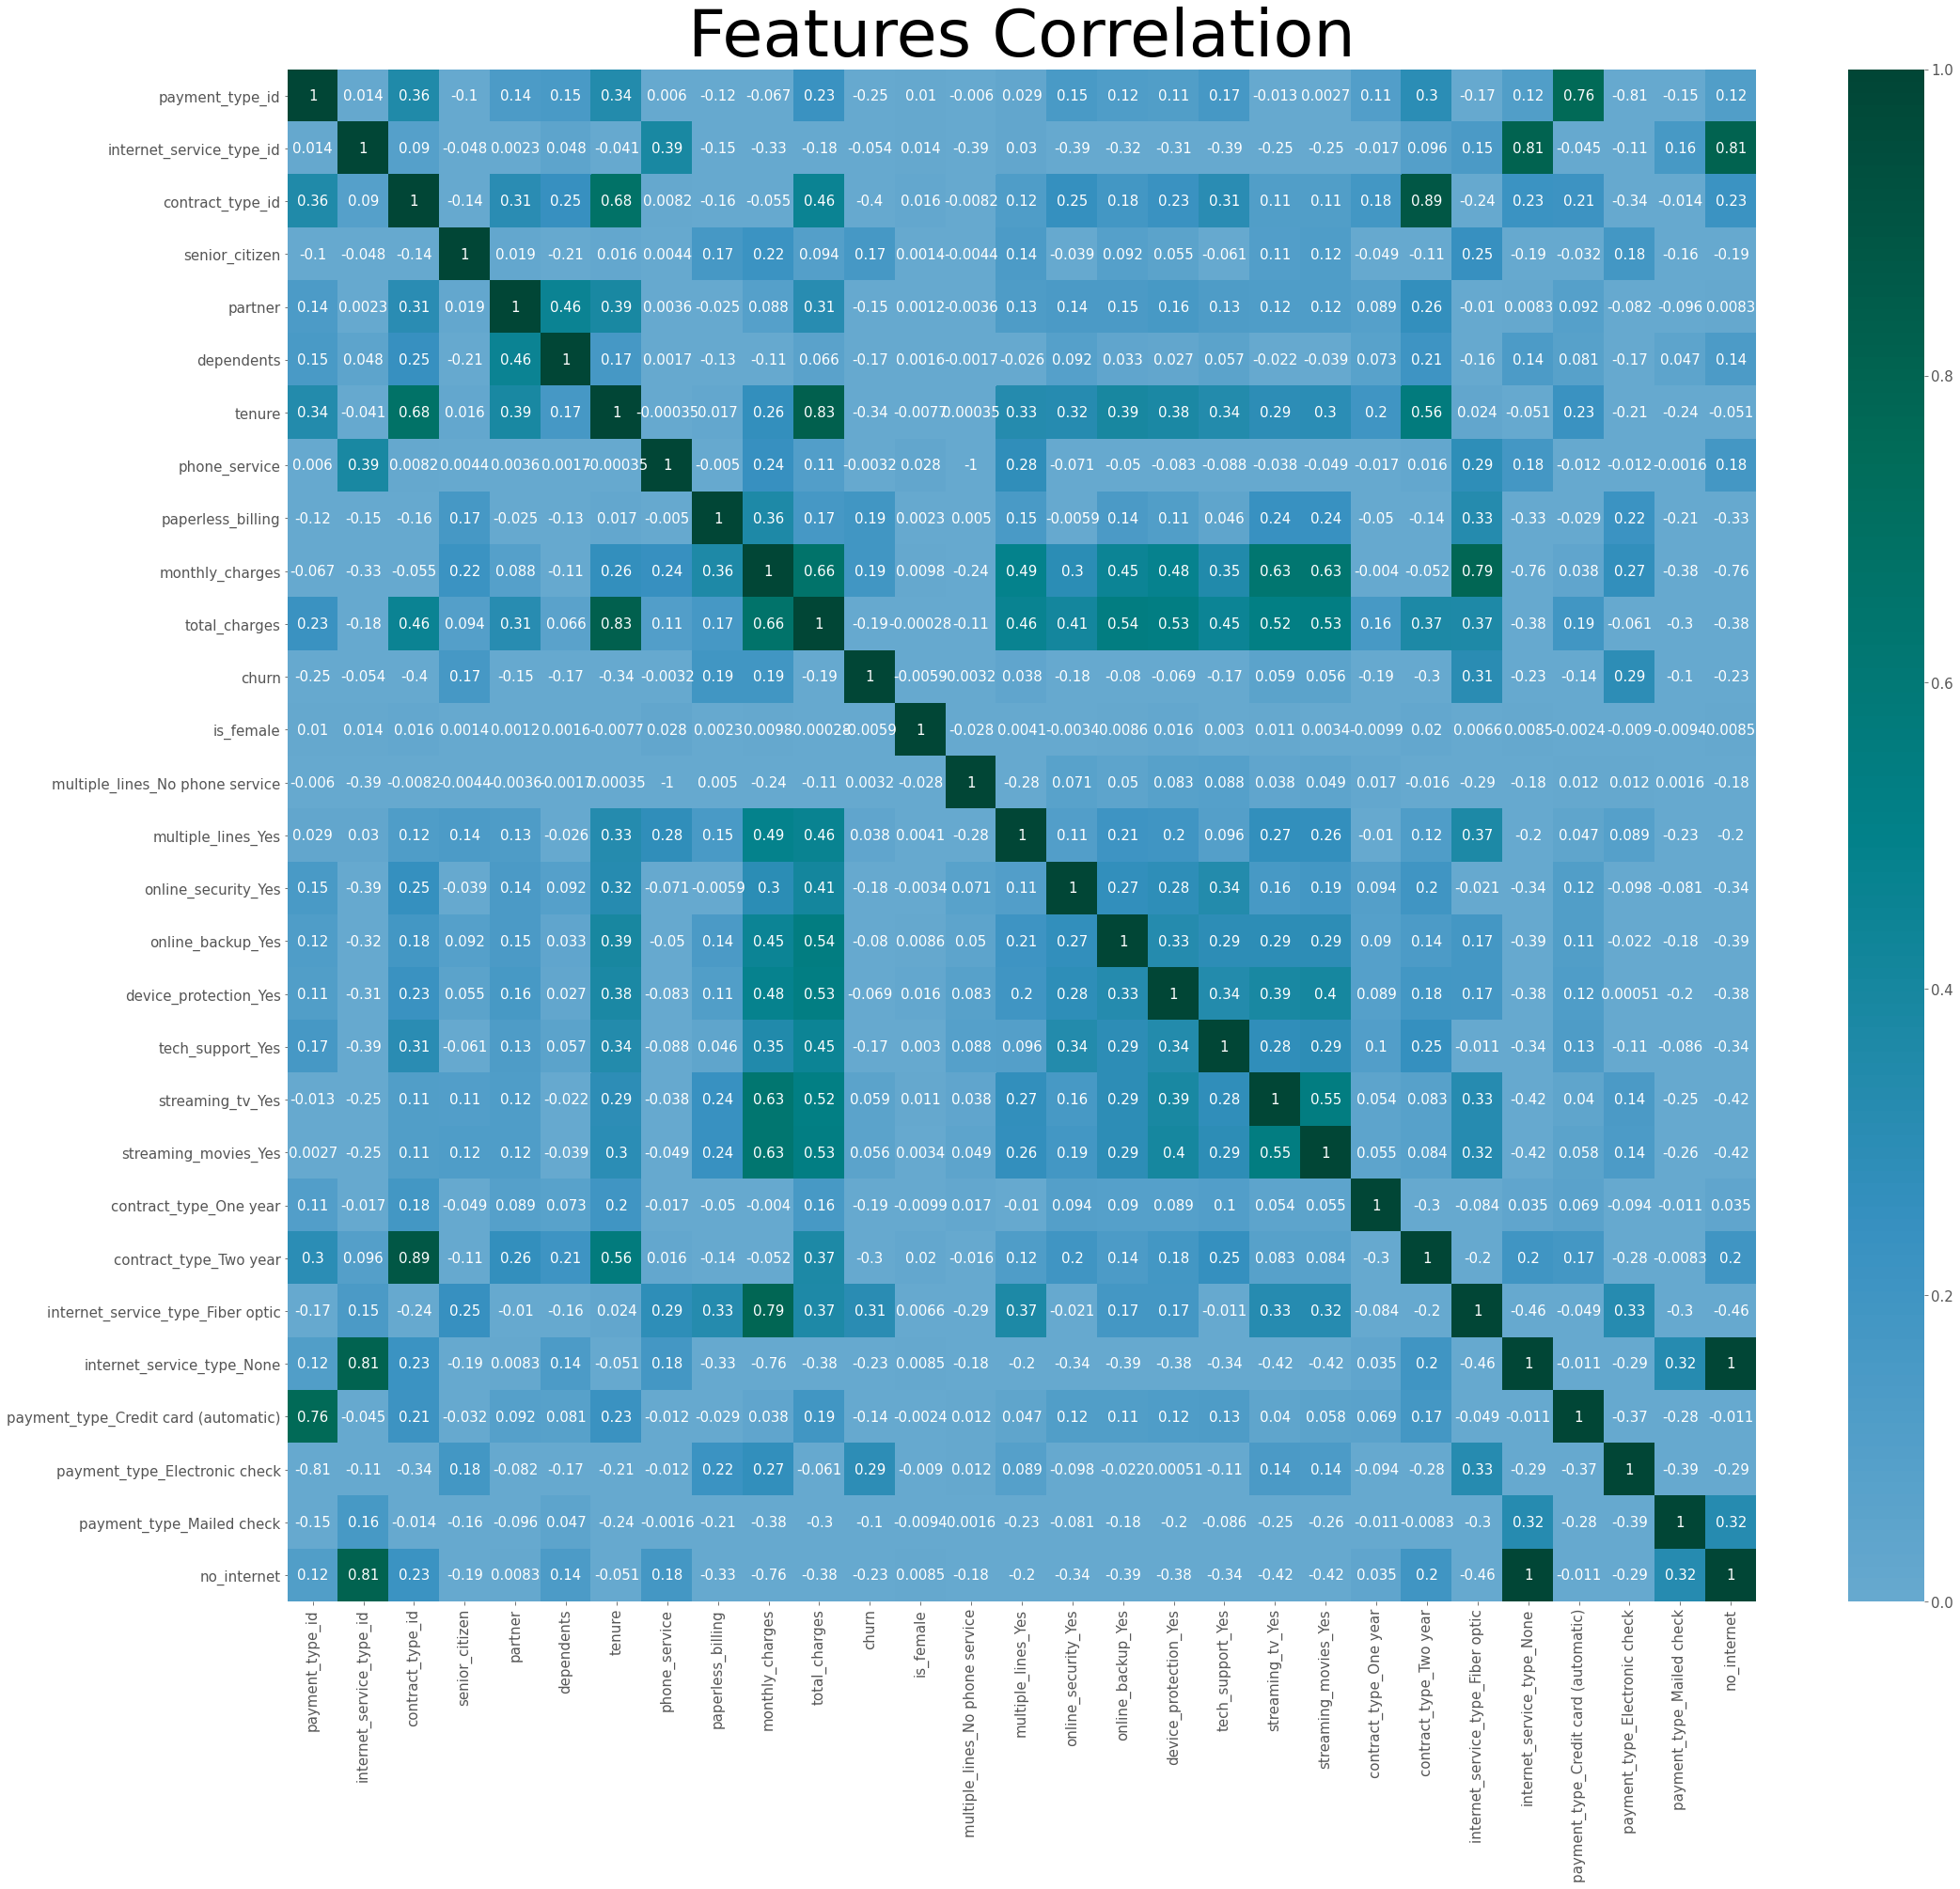

In [36]:
# chrats heat map  showing correlation 
plt.rc('figure', figsize=(35, 30))
plt.rc('font', size=15)
sns.heatmap(train.corr(), cmap="PuBuGn",\
            annot=True,\
            center=0,
            vmin=0, vmax=1) # allows for better visual identification of correlation 

plt.title('Features Correlation', size=70)
plt.show()

##  Takeaways

- Fiver optics drive monthly charges up 
- seems that people that pay with electronic check tend to churn more than normal
- Senior citicents seem to have some relation with churn
- Tenure is strong with that use added services service such as `Online backup`

Questions to hypothesys

